<a href="https://colab.research.google.com/github/entc-17-fyp-20/ResultsComparison/blob/Kusal/CNN(research_paper_2017)_model_for_short_term_power_forecasting_Belgium_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataframe** 

In [61]:
import os
import warnings
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt
from collections import UserDict
from sklearn.preprocessing import MinMaxScaler
from IPython.display import Image
%matplotlib inline
import plotly.express as px
import io


pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)
warnings.filterwarnings("ignore")

url1 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/S6%2010%20seconed%20data.csv' #S6 10 seconed data.csv
url2 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_1.csv' #AE59_1
url3 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/AE59_2.csv' #AE59_2
url4 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20June%2010%20sec%20data.csv' #V08 June 10 sec data.csv; does not contain current columns
url5 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20June%2010%20sec%20data.csv' #V13 June 10 sec data.csv
url6 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V08%20July%2010%20sec%20data.csv' #V08 July 10 sec data.csv
url7 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/V13%20July%2010%20sec%20data.csv' #V13 July 10 sec data.csv
url8 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar.csv'  #Mannar dataset-10_min-wind_speed.csv
url9 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Mannar%20full%20data.csv' #Mannar full data set.csv
url10 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/2018%20Scada%20Data%20of%20a%20Wind%20Turbine%20in%20Turkey.csv' #2018 Scada Data of a Wind Turbine in Turkey - 10 min resolution data
url11 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB%20new%20updated(Only%20actual).csv' #CEB new dataset
url12 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/CEB_dataset_full_august_to_december.csv' #merged CEB dataset
url13 = 'https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/Belgium_2017_15_min.csv' #Belgium-2017 dataset

**Train an validation data set**

In [62]:
df = pd.read_csv(url13)
df=pd.DataFrame(df)
df_temp=df.copy()
df_temp.count

<bound method DataFrame.count of                         Datetime Resolution code Offshore/onshore    Region  \
0      2017-12-31 23:45:00+01:00           PT15M          Onshore  Flanders   
1      2017-12-31 23:30:00+01:00           PT15M          Onshore  Flanders   
2      2017-12-31 23:15:00+01:00           PT15M          Onshore  Flanders   
3      2017-12-31 23:00:00+01:00           PT15M          Onshore  Flanders   
4      2017-12-31 22:45:00+01:00           PT15M          Onshore  Flanders   
...                          ...             ...              ...       ...   
26399  2017-04-01 01:00:00+02:00           PT15M          Onshore  Flanders   
26400  2017-04-01 00:45:00+02:00           PT15M          Onshore  Flanders   
26401  2017-04-01 00:30:00+02:00           PT15M          Onshore  Flanders   
26402  2017-04-01 00:15:00+02:00           PT15M          Onshore  Flanders   
26403  2017-04-01 00:00:00+02:00           PT15M          Onshore  Flanders   

      Grid connect

In [ ]:
# test_set_1 = df_temp[5000:5500]  #10/1/2021 00:00 to 10/10/2021 23:50
# test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
# test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

# dataset_index=1

# if dataset_index==1:
#   df_test = test_set_1
# elif dataset_index==2:
#   df_test = test_set_2
# elif dataset_index==3:
#   df_test = test_set_3

#df_test

In [63]:
df_temp

,Datetime,Resolution code,Offshore/onshore,Region,Grid connection type,Measured & Upscaled,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2017-12-31 23:45:00+01:00,PT15M,Onshore,Flanders,Elia,40.67,45.41,41.45,48.65,46.60,...,49.52,46.24,40.95,49.79,30.49,13.63,46.53,53.86,0.76,0
1,2017-12-31 23:30:00+01:00,PT15M,Onshore,Flanders,Elia,42.19,44.93,40.51,48.53,46.17,...,49.55,45.80,40.02,49.84,30.54,13.74,46.54,53.86,0.78,0
2,2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,...,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0
3,2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,...,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
4,2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,...,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26399,2017-04-01 01:00:00+02:00,PT15M,Onshore,Flanders,Elia,4.57,3.21,0.48,6.56,2.47,...,5.67,3.78,0.61,6.96,16.81,2.73,30.91,63.01,0.07,0
26400,2017-04-01 00:45:00+02:00,PT15M,Onshore,Flanders,Elia,3.91,2.82,0.53,5.73,1.93,...,4.69,3.38,0.54,6.18,16.66,2.67,30.67,63.01,0.06,0
26401,2017-04-01 00:30:00+02:00,PT15M,Onshore,Flanders,Elia,3.60,2.53,0.58,5.06,1.56,...,3.97,3.06,0.49,5.54,16.48,2.58,30.39,63.01,0.06,0
26402,2017-04-01 00:15:00+02:00,PT15M,Onshore,Flanders,Elia,2.85,2.24,0.64,4.39,1.20,...,3.26,2.75,0.43,4.91,16.29,2.50,30.10,63.01,0.05,0


**Rename column names**

In [64]:
col_1=(df_temp.columns)[0]
col_2=(df_temp.columns)[5]
feature = 'Active Power'
# feature_1 = 'Forecasted Power'
df_temp.rename(columns={col_1 :'Date & Time' , col_2 : feature},inplace=True)
#df


In [65]:
df_temp

,Date & Time,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,...,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
0,2017-12-31 23:45:00+01:00,PT15M,Onshore,Flanders,Elia,40.67,45.41,41.45,48.65,46.60,...,49.52,46.24,40.95,49.79,30.49,13.63,46.53,53.86,0.76,0
1,2017-12-31 23:30:00+01:00,PT15M,Onshore,Flanders,Elia,42.19,44.93,40.51,48.53,46.17,...,49.55,45.80,40.02,49.84,30.54,13.74,46.54,53.86,0.78,0
2,2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,...,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0
3,2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,...,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
4,2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,...,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26399,2017-04-01 01:00:00+02:00,PT15M,Onshore,Flanders,Elia,4.57,3.21,0.48,6.56,2.47,...,5.67,3.78,0.61,6.96,16.81,2.73,30.91,63.01,0.07,0
26400,2017-04-01 00:45:00+02:00,PT15M,Onshore,Flanders,Elia,3.91,2.82,0.53,5.73,1.93,...,4.69,3.38,0.54,6.18,16.66,2.67,30.67,63.01,0.06,0
26401,2017-04-01 00:30:00+02:00,PT15M,Onshore,Flanders,Elia,3.60,2.53,0.58,5.06,1.56,...,3.97,3.06,0.49,5.54,16.48,2.58,30.39,63.01,0.06,0
26402,2017-04-01 00:15:00+02:00,PT15M,Onshore,Flanders,Elia,2.85,2.24,0.64,4.39,1.20,...,3.26,2.75,0.43,4.91,16.29,2.50,30.10,63.01,0.05,0


In [ ]:
#df_temp.loc[13047]

**Set Data & Time as index**

In [66]:
df_temp=df_temp.set_index('Date & Time')
df_temp=df_temp[::-1]
df_temp

,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Date & Time,,,,,,,,,,,,,,,,,,,,
2017-04-01 00:00:00+02:00,PT15M,Onshore,Flanders,Elia,2.34,1.95,0.69,3.72,0.84,0.00,2.54,2.44,0.38,4.27,16.11,2.42,29.81,63.01,0.04,0
2017-04-01 00:15:00+02:00,PT15M,Onshore,Flanders,Elia,2.85,2.24,0.64,4.39,1.20,0.01,3.26,2.75,0.43,4.91,16.29,2.50,30.10,63.01,0.05,0
2017-04-01 00:30:00+02:00,PT15M,Onshore,Flanders,Elia,3.60,2.53,0.58,5.06,1.56,0.02,3.97,3.06,0.49,5.54,16.48,2.58,30.39,63.01,0.06,0
2017-04-01 00:45:00+02:00,PT15M,Onshore,Flanders,Elia,3.91,2.82,0.53,5.73,1.93,0.03,4.69,3.38,0.54,6.18,16.66,2.67,30.67,63.01,0.06,0
2017-04-01 01:00:00+02:00,PT15M,Onshore,Flanders,Elia,4.57,3.21,0.48,6.56,2.47,0.04,5.67,3.78,0.61,6.96,16.81,2.73,30.91,63.01,0.07,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,37.26,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,38.22,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,39.15,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0


In [68]:
scaler = MinMaxScaler()

In [69]:
df_temp=pd.DataFrame(df_temp[feature])
df_temp[feature] = scaler.fit_transform(df_temp)
df_temp

,Active Power
Date & Time,
2017-04-01 00:00:00+02:00,0.05
2017-04-01 00:15:00+02:00,0.06
2017-04-01 00:30:00+02:00,0.07
2017-04-01 00:45:00+02:00,0.08
2017-04-01 01:00:00+02:00,0.09
...,...
2017-12-31 22:45:00+01:00,0.78
2017-12-31 23:00:00+01:00,0.84
2017-12-31 23:15:00+01:00,0.87


In [105]:
T = 400
HORIZON = 16

In [106]:
for i in range(1,HORIZON+1):
  df_temp['y_t+'+str(i)] = df_temp[feature].shift(-i)
df_temp.head(10)

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0,y_t+11,y_t+12,y_t+13,y_t+14,y_t+15,y_t+16
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-05 03:45:00+02:00,0.27,0.28,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,...,0.19,0.19,0.27,0.27,0.26,0.27,0.26,0.19,0.18,0.19
2017-04-05 04:00:00+02:00,0.28,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,...,0.19,0.27,0.27,0.28,0.27,0.26,0.19,0.18,0.19,0.19
2017-04-05 04:15:00+02:00,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,...,0.27,0.27,0.28,0.24,0.26,0.19,0.18,0.19,0.19,0.20
2017-04-05 04:30:00+02:00,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,...,0.27,0.28,0.24,0.20,0.19,0.18,0.19,0.19,0.20,0.19
2017-04-05 04:45:00+02:00,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,0.26,...,0.28,0.24,0.20,0.22,0.18,0.19,0.19,0.20,0.19,0.14
2017-04-05 05:00:00+02:00,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,0.26,0.19,...,0.24,0.20,0.22,0.21,0.19,0.19,0.20,0.19,0.14,0.14
2017-04-05 05:15:00+02:00,0.23,0.21,0.23,0.28,0.27,0.26,0.27,0.26,0.19,0.18,...,0.20,0.22,0.21,0.23,0.19,0.20,0.19,0.14,0.14,0.15
2017-04-05 05:30:00+02:00,0.21,0.23,0.28,0.27,0.26,0.27,0.26,0.19,0.18,0.19,...,0.22,0.21,0.23,0.21,0.20,0.19,0.14,0.14,0.15,0.17
2017-04-05 05:45:00+02:00,0.23,0.28,0.27,0.26,0.27,0.26,0.19,0.18,0.19,0.19,...,0.21,0.23,0.21,0.23,0.19,0.14,0.14,0.15,0.17,0.17


In [107]:
for t in range(1, T+1):
    df_temp['active_power_t-'+str(T-t)] = df_temp[feature].shift(T-t)
df_temp = df_temp.rename(columns={feature:'Current_active_power'})
df_temp

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0,y_t+11,y_t+12,y_t+13,y_t+14,y_t+15,y_t+16
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-05 03:45:00+02:00,0.27,0.28,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,...,NaN,NaN,NaN,0.27,0.26,0.27,0.26,0.19,0.18,0.19
2017-04-05 04:00:00+02:00,0.28,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,...,NaN,NaN,0.27,0.28,0.27,0.26,0.19,0.18,0.19,0.19
2017-04-05 04:15:00+02:00,0.24,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,...,NaN,0.27,0.28,0.24,0.26,0.19,0.18,0.19,0.19,0.20
2017-04-05 04:30:00+02:00,0.20,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,...,0.27,0.28,0.24,0.20,0.19,0.18,0.19,0.19,0.20,0.19
2017-04-05 04:45:00+02:00,0.22,0.21,0.23,0.21,0.23,0.28,0.27,0.26,0.27,0.26,...,0.28,0.24,0.20,0.22,0.18,0.19,0.19,0.20,0.19,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 20:15:00+01:00,0.74,0.77,0.79,0.81,0.84,NaN,NaN,NaN,NaN,NaN,...,0.78,0.81,0.76,0.74,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 20:30:00+01:00,0.77,0.79,0.81,0.84,NaN,NaN,NaN,NaN,NaN,NaN,...,0.81,0.76,0.74,0.77,NaN,NaN,NaN,NaN,NaN,NaN
2017-12-31 20:45:00+01:00,0.79,0.81,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.76,0.74,0.77,0.79,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
df_temp = df_temp.dropna(how='any')
df_temp

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0,y_t+11,y_t+12,y_t+13,y_t+14,y_t+15,y_t+16
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-09 07:30:00+02:00,0.10,0.09,0.08,0.08,0.09,0.08,0.09,0.07,0.04,0.02,...,0.13,0.12,0.11,0.10,0.01,0.01,0.02,0.02,0.02,0.02
2017-04-09 07:45:00+02:00,0.09,0.08,0.08,0.09,0.08,0.09,0.07,0.04,0.02,0.01,...,0.12,0.11,0.10,0.09,0.01,0.02,0.02,0.02,0.02,0.02
2017-04-09 08:00:00+02:00,0.08,0.08,0.09,0.08,0.09,0.07,0.04,0.02,0.01,0.01,...,0.11,0.10,0.09,0.08,0.02,0.02,0.02,0.02,0.02,0.02
2017-04-09 08:15:00+02:00,0.08,0.09,0.08,0.09,0.07,0.04,0.02,0.01,0.01,0.01,...,0.10,0.09,0.08,0.08,0.02,0.02,0.02,0.02,0.02,0.03
2017-04-09 08:30:00+02:00,0.09,0.08,0.09,0.07,0.04,0.02,0.01,0.01,0.01,0.02,...,0.09,0.08,0.08,0.09,0.02,0.02,0.02,0.02,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 16:15:00+01:00,0.62,0.55,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,...,0.66,0.70,0.68,0.62,0.67,0.68,0.78,0.81,0.76,0.74
2017-12-31 16:30:00+01:00,0.55,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,...,0.70,0.68,0.62,0.55,0.68,0.78,0.81,0.76,0.74,0.77
2017-12-31 16:45:00+01:00,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67,...,0.68,0.62,0.55,0.49,0.78,0.81,0.76,0.74,0.77,0.79


In [109]:
df = df_temp[:25000]
df

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0,y_t+11,y_t+12,y_t+13,y_t+14,y_t+15,y_t+16
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-04-09 07:30:00+02:00,0.10,0.09,0.08,0.08,0.09,0.08,0.09,0.07,0.04,0.02,...,0.13,0.12,0.11,0.10,0.01,0.01,0.02,0.02,0.02,0.02
2017-04-09 07:45:00+02:00,0.09,0.08,0.08,0.09,0.08,0.09,0.07,0.04,0.02,0.01,...,0.12,0.11,0.10,0.09,0.01,0.02,0.02,0.02,0.02,0.02
2017-04-09 08:00:00+02:00,0.08,0.08,0.09,0.08,0.09,0.07,0.04,0.02,0.01,0.01,...,0.11,0.10,0.09,0.08,0.02,0.02,0.02,0.02,0.02,0.02
2017-04-09 08:15:00+02:00,0.08,0.09,0.08,0.09,0.07,0.04,0.02,0.01,0.01,0.01,...,0.10,0.09,0.08,0.08,0.02,0.02,0.02,0.02,0.02,0.03
2017-04-09 08:30:00+02:00,0.09,0.08,0.09,0.07,0.04,0.02,0.01,0.01,0.01,0.02,...,0.09,0.08,0.08,0.09,0.02,0.02,0.02,0.02,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25 15:15:00+01:00,0.62,0.64,0.63,0.61,0.62,0.59,0.59,0.65,0.69,0.68,...,0.60,0.60,0.60,0.62,0.69,0.65,0.63,0.63,0.62,0.60
2017-12-25 15:30:00+01:00,0.64,0.63,0.61,0.62,0.59,0.59,0.65,0.69,0.68,0.71,...,0.60,0.60,0.62,0.64,0.65,0.63,0.63,0.62,0.60,0.61
2017-12-25 15:45:00+01:00,0.63,0.61,0.62,0.59,0.59,0.65,0.69,0.68,0.71,0.69,...,0.60,0.62,0.64,0.63,0.63,0.63,0.62,0.60,0.61,0.63


**Divide train and validation sets**

In [110]:
L=len(df)
valid_start=int(8*L/10)

train,valid=df[:valid_start],df[valid_start:]

#print(train.shape)
#print(valid.shape)
#print(test.shape)

#print(train.describe())
#print(valid.describe())
#print(test.describe())

# **Data preparation**

**Train input and target arrays**

In [111]:
y_train = np.array(train[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
X_train=np.array(train[['active_power_t-'+str(T-t) for t in range(1, T+1)]])

In [112]:
# This is an important step to reshape the X into 3 dimension array
X_train = X_train.reshape(X_train.shape[0], 20,20, 1)

In [113]:
print(y_train.shape)
print(X_train.shape)

(20000, 16)
(20000, 20, 20, 1)


**Data preparation - Validation data**

In [114]:
y_valid = np.array(valid[["y_t+"+str(i) for i in range(1,HORIZON+1)]])
X_valid=np.array(valid[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_valid = X_valid.reshape(X_valid.shape[0], 20,20, 1)

In [115]:
print(y_valid.shape)
print(X_valid.shape)

(5000, 16)
(5000, 20, 20, 1)


# **Implement the GRU-RNN**

In [116]:
from keras.models import Model, Sequential
from keras.layers import GRU, Dense
from keras.callbacks import EarlyStopping
from tensorflow.keras import datasets, layers, models

In [117]:
model = models.Sequential()
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(20,20, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(12, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
# model.add(layers.Dense(HORIZON, activation='relu'))
model.add(layers.Dense(units=HORIZON, input_shape=(48,1)))

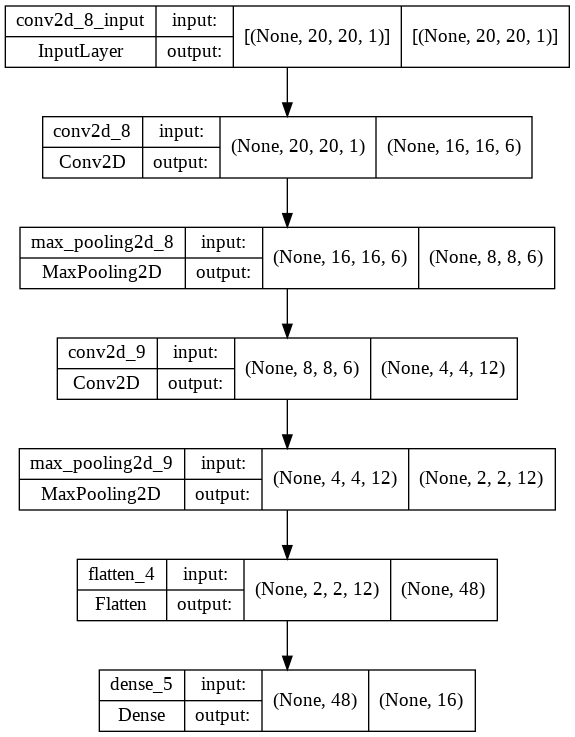

In [118]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [119]:
UNITS = 5 # number of units in the RNN layer
BATCH_SIZE = 32 # number of samples per mini-batch
EPOCHS = 100 # maximum number of times the training algorithm will cycle through all samples

In [ ]:
# model = Sequential()
# model.add(GRU(UNITS, input_shape=(T, 1)))
# model.add(Dense(HORIZON))

In [121]:
model.compile(optimizer='RMSprop', loss='mse')
#model.summary()

In [122]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 16, 16, 6)         156       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 8, 8, 6)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 12)          1812      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 2, 2, 12)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 48)                0         
                                                                 
 dense_5 (Dense)             (None, 16)               

In [123]:
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [124]:
history = model.fit(X_train,
                    y_train,
                    batch_size=BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(X_valid, y_valid),
                    callbacks=[earlystop],
                    verbose=1)

Epoch 1/100
625/625 [==============================] - 6s 8ms/step - loss: 0.0282 - val_loss: 0.0261
Epoch 2/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0196 - val_loss: 0.0203
Epoch 3/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0164 - val_loss: 0.0182
Epoch 4/100
625/625 [==============================] - 5s 7ms/step - loss: 0.0151 - val_loss: 0.0178
Epoch 5/100
625/625 [==============================] - 5s 9ms/step - loss: 0.0142 - val_loss: 0.0179
Epoch 6/100
625/625 [==============================] - 5s 7ms/step - loss: 0.0138 - val_loss: 0.0173
Epoch 7/100
625/625 [==============================] - 5s 8ms/step - loss: 0.0133 - val_loss: 0.0181
Epoch 8/100
625/625 [==============================] - 8s 13ms/step - loss: 0.0128 - val_loss: 0.0170
Epoch 9/100
625/625 [==============================] - 6s 9ms/step - loss: 0.0125 - val_loss: 0.0179
Epoch 10/100
625/625 [==============================] - 6s 10ms/step - loss: 0.0122 - val_

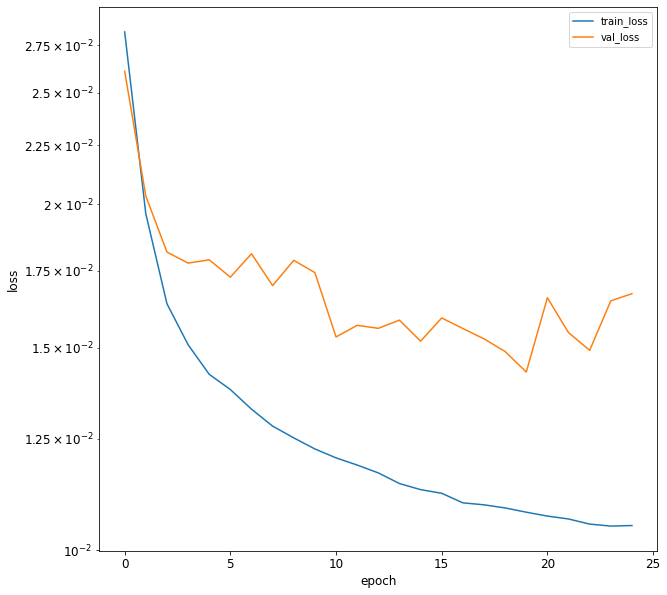

In [125]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

MessageError: ignored

In [ ]:
# # Save the weights
# path = '/content/drive/MyDrive/Colab Notebooks/Weights/GRU/model.h5'
# model.save(path)

# **Evaluate the model**

**Load test data set**

In [ ]:
#df_test = pd.read_csv(url11)
#df_test=pd.DataFrame(df_test)

In [126]:
test_set_1 = df_temp[25000:]  #10/1/2021 00:00 to 10/10/2021 23:50
test_set_2 = df_temp[10168:11608] #10/11/2021 00:00 to 10/20/2021 23:50
test_set_3 = df_temp[11608:13048] #10/21/2021 00:00 to 10/30/2021 23:50

dataset_index=1

if dataset_index==1:
  df_test = test_set_1
elif dataset_index==2:
  df_test = test_set_2
elif dataset_index==3:
  df_test = test_set_3

df_test

,Current_active_power,y_t+1,y_t+2,y_t+3,y_t+4,y_t+5,y_t+6,y_t+7,y_t+8,y_t+9,...,active_power_t-3,active_power_t-2,active_power_t-1,active_power_t-0,y_t+11,y_t+12,y_t+13,y_t+14,y_t+15,y_t+16
Date & Time,,,,,,,,,,,,,,,,,,,,,
2017-12-25 16:30:00+01:00,0.59,0.59,0.65,0.69,0.68,0.71,0.69,0.65,0.63,0.63,...,0.63,0.61,0.62,0.59,0.60,0.61,0.63,0.64,0.68,0.67
2017-12-25 16:45:00+01:00,0.59,0.65,0.69,0.68,0.71,0.69,0.65,0.63,0.63,0.62,...,0.61,0.62,0.59,0.59,0.61,0.63,0.64,0.68,0.67,0.72
2017-12-25 17:00:00+01:00,0.65,0.69,0.68,0.71,0.69,0.65,0.63,0.63,0.62,0.60,...,0.62,0.59,0.59,0.65,0.63,0.64,0.68,0.67,0.72,0.65
2017-12-25 17:15:00+01:00,0.69,0.68,0.71,0.69,0.65,0.63,0.63,0.62,0.60,0.61,...,0.59,0.59,0.65,0.69,0.64,0.68,0.67,0.72,0.65,0.62
2017-12-25 17:30:00+01:00,0.68,0.71,0.69,0.65,0.63,0.63,0.62,0.60,0.61,0.63,...,0.59,0.65,0.69,0.68,0.68,0.67,0.72,0.65,0.62,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 16:15:00+01:00,0.62,0.55,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,...,0.66,0.70,0.68,0.62,0.67,0.68,0.78,0.81,0.76,0.74
2017-12-31 16:30:00+01:00,0.55,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,...,0.70,0.68,0.62,0.55,0.68,0.78,0.81,0.76,0.74,0.77
2017-12-31 16:45:00+01:00,0.49,0.48,0.47,0.50,0.52,0.59,0.61,0.60,0.62,0.67,...,0.68,0.62,0.55,0.49,0.78,0.81,0.76,0.74,0.77,0.79


In [91]:
# col_1=(df_test.columns)[0]
# col_2=(df_test.columns)[5]
# #col_3=(df_test.columns)[2]
# feature = 'Active Power'
# feature_1 = 'Forecasted Power'
# df_test.rename(columns={col_1 :'Date & Time' , col_2 : feature },inplace=True)

In [ ]:
# df_test=df_test.set_index('Date & Time')
# #df_test = df_test.apply(pd.to_numeric)
# #df_test=df_test.div(1000)
# df

,Resolution code,Offshore/onshore,Region,Grid connection type,Active Power,Most recent forecast,Most recent P10,Most recent P90,Day Ahead 11AM forecast,Day Ahead 11AM P10,Day Ahead 11AM P90,Day-ahead 6PM forecast,Day-ahead 6PM P10,Day-ahead 6PM P90,Week-ahead forecast,Week-ahead P10,Week-ahead P90,Monitored capacity,Load factor,Decremental bid Indicator
Date & Time,,,,,,,,,,,,,,,,,,,,
2017-04-05 05:00:00+02:00,PT15M,Onshore,Flanders,Elia,9.88,8.11,2.61,13.62,8.47,2.02,15.23,8.13,1.88,14.74,9.80,0.67,19.03,63.01,0.16,0
2017-04-05 05:15:00+02:00,PT15M,Onshore,Flanders,Elia,11.26,8.48,2.74,14.22,8.75,2.21,15.59,8.60,2.21,15.33,9.80,0.63,19.07,63.01,0.18,0
2017-04-05 05:30:00+02:00,PT15M,Onshore,Flanders,Elia,9.96,8.84,2.87,14.82,9.04,2.41,15.95,9.08,2.55,15.91,9.81,0.59,19.11,63.01,0.16,0
2017-04-05 05:45:00+02:00,PT15M,Onshore,Flanders,Elia,11.01,9.21,3.00,15.42,9.32,2.60,16.30,9.55,2.88,16.49,9.81,0.56,19.14,63.01,0.17,0
2017-04-05 06:00:00+02:00,PT15M,Onshore,Flanders,Elia,13.45,10.73,3.77,16.85,9.49,2.69,16.54,9.80,3.05,16.80,9.85,0.53,19.24,63.01,0.21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 22:45:00+01:00,PT15M,Onshore,Flanders,Elia,37.72,43.43,37.61,48.21,44.82,37.26,49.65,44.45,37.22,49.96,30.70,14.10,46.55,53.86,0.70,0
2017-12-31 23:00:00+01:00,PT15M,Onshore,Flanders,Elia,40.59,43.97,38.63,48.30,45.32,38.22,49.63,44.91,38.13,49.94,30.65,13.97,46.55,53.86,0.75,0
2017-12-31 23:15:00+01:00,PT15M,Onshore,Flanders,Elia,41.74,44.45,39.57,48.42,45.75,39.15,49.59,45.35,39.07,49.89,30.59,13.86,46.55,53.86,0.78,0


In [127]:
feature = "Current_active_power"
count = (df_test[feature] == 0).sum()
count

0

**Preprocessing technique**

In [128]:
#df_test[feature]=df_test[feature].replace(0,df_test[feature].median())
df_test[feature]=df_test[feature].replace(to_replace=0, method='ffill').values

In [129]:
y_test = np.array(df_test[['y_t+'+str(i) for i in range(1,HORIZON+1)]])
X_test=np.array(df_test[['active_power_t-'+str(T-t) for t in range(1, T+1)]])
X_test = X_test.reshape(X_test.shape[0], 20,20, 1)
#X_test

In [130]:
print(y_test.shape)
print(X_test.shape)

(580, 16)
(580, 20, 20, 1)


In [131]:
predictions = model.predict(X_test)
predictions=pd.DataFrame(predictions)
print(predictions)

      0    1    2    3    4    5    6    7    8    9    10   11   12   13  \
0   0.60 0.58 0.61 0.62 0.58 0.59 0.59 0.57 0.58 0.57 0.57 0.56 0.56 0.55   
1   0.63 0.62 0.65 0.66 0.62 0.62 0.64 0.60 0.62 0.60 0.61 0.60 0.60 0.58   
2   0.64 0.63 0.65 0.65 0.62 0.63 0.63 0.61 0.62 0.61 0.61 0.60 0.60 0.59   
3   0.68 0.67 0.67 0.66 0.65 0.65 0.65 0.64 0.65 0.64 0.63 0.63 0.62 0.62   
4   0.68 0.67 0.67 0.66 0.65 0.64 0.65 0.63 0.65 0.63 0.63 0.63 0.62 0.62   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
575 0.82 0.81 0.83 0.81 0.81 0.78 0.75 0.77 0.73 0.76 0.71 0.68 0.72 0.68   
576 0.80 0.79 0.79 0.78 0.77 0.76 0.73 0.74 0.71 0.72 0.68 0.66 0.69 0.66   
577 0.79 0.79 0.78 0.79 0.75 0.76 0.72 0.74 0.72 0.72 0.68 0.67 0.69 0.66   
578 0.73 0.73 0.72 0.74 0.68 0.69 0.66 0.66 0.65 0.64 0.61 0.60 0.63 0.59   
579 0.72 0.72 0.70 0.71 0.66 0.67 0.64 0.64 0.63 0.62 0.58 0.58 0.61 0.57   

      14   15  
0   0.55 0.53  
1   0.59 0.57  
2   0.59 0.57  
3   0.61 0.

In [132]:
x = pd.DataFrame()
x['Date & Time'] = df_test.index
x['Current output power']= np.array(df_test['Current_active_power'])
x['Current output power']=scaler.inverse_transform(np.array(x[['Current output power']]))
for i in range(1,HORIZON+1):
  x['predictions t+'+str(i)]=predictions[i-1]
  x[['predictions t+'+str(i)]]=scaler.inverse_transform(np.array(x[['predictions t+'+str(i)]]))
  x['actual t+'+str(i)]=pd.DataFrame(y_test)[i-1]
  x[['actual t+'+str(i)]]=scaler.inverse_transform(np.array(x[['actual t+'+str(i)]]))
  
x

,Date & Time,Current output power,predictions t+1,actual t+1,predictions t+2,actual t+2,predictions t+3,actual t+3,predictions t+4,actual t+4,...,predictions t+12,actual t+12,predictions t+13,actual t+13,predictions t+14,actual t+14,predictions t+15,actual t+15,predictions t+16,actual t+16
0,2017-12-25 16:30:00+01:00,0.59,0.60,0.59,0.58,0.65,0.61,0.69,0.62,0.68,...,0.56,0.61,0.56,0.63,0.55,0.64,0.55,0.68,0.53,0.67
1,2017-12-25 16:45:00+01:00,0.59,0.63,0.65,0.62,0.69,0.65,0.68,0.66,0.71,...,0.60,0.63,0.60,0.64,0.58,0.68,0.59,0.67,0.57,0.72
2,2017-12-25 17:00:00+01:00,0.65,0.64,0.69,0.63,0.68,0.65,0.71,0.65,0.69,...,0.60,0.64,0.60,0.68,0.59,0.67,0.59,0.72,0.57,0.65
3,2017-12-25 17:15:00+01:00,0.69,0.68,0.68,0.67,0.71,0.67,0.69,0.66,0.65,...,0.63,0.68,0.62,0.67,0.62,0.72,0.61,0.65,0.60,0.62
4,2017-12-25 17:30:00+01:00,0.68,0.68,0.71,0.67,0.69,0.67,0.65,0.66,0.63,...,0.63,0.67,0.62,0.72,0.62,0.65,0.62,0.62,0.61,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
575,2017-12-31 16:15:00+01:00,0.62,0.82,0.55,0.81,0.49,0.83,0.48,0.81,0.47,...,0.68,0.68,0.72,0.78,0.68,0.81,0.68,0.76,0.65,0.74
576,2017-12-31 16:30:00+01:00,0.55,0.80,0.49,0.79,0.48,0.79,0.47,0.78,0.50,...,0.66,0.78,0.69,0.81,0.66,0.76,0.65,0.74,0.62,0.77
577,2017-12-31 16:45:00+01:00,0.49,0.79,0.48,0.79,0.47,0.78,0.50,0.79,0.52,...,0.67,0.81,0.69,0.76,0.66,0.74,0.64,0.77,0.61,0.79
578,2017-12-31 17:00:00+01:00,0.48,0.73,0.47,0.73,0.50,0.72,0.52,0.74,0.59,...,0.60,0.76,0.63,0.74,0.59,0.77,0.58,0.79,0.55,0.81


**Performance Evaluation over all steps for 1 input**

In [160]:
row_1=x.iloc[1]

In [161]:
def mae(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) 
def rmse(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    x=np.mean((actual - pred)**2)
    return np.sqrt(x)
def mse(actual,pred):
    actual, pred = np.array(actual), np.array(pred)
    return(np.mean((actual - pred)**2))

from sklearn.metrics import r2_score

In [162]:
actual = np.array(row_1[["actual t+"+str(i) for i in range(1,HORIZON+1)]])
pred = np.array(row_1[["predictions t+"+str(i) for i in range(1,HORIZON+1)]])
print(mae(actual, pred))
print(rmse(actual,pred))
print(mse(actual,pred))
print('R^2 for model = '+ str(round(r2_score(actual, pred),2)))

0.06650687112188472
0.05959517729525274
0.003551585156852607
R^2 for model = -1.85


**Performance metrics for each step**

In [154]:
for i in range(1,HORIZON+1):
  actual = x['actual t+'+str(i)]
  pred = x['predictions t+'+str(i)]
  mae_value=mae(actual, pred)
  rmse_value=rmse(actual,pred)
  mse_value=mse(actual,pred)
  
  print('CNN Model: MAE  for t+'+str(i)+ ' = '+str(mae_value))
  print('CNN Model: RMSE for t+'+str(i)+' = '+str(rmse_value))
  print('CNN Model: MSE  for t+'+str(i)+ ' = '+str(mse_value))
  # print('CNN Model: R^2 for t+'+str(i)+'= '+str(round(r2_score(actual, pred),2))

CNN Model: MAE  for t+1 = 0.2405753886726157
CNN Model: RMSE for t+1 = 0.12624607443573763
CNN Model: MSE  for t+1 = 0.01593807131043381
CNN Model: MAE  for t+2 = 0.2561656352926769
CNN Model: RMSE for t+2 = 0.1361564311302821
CNN Model: MSE  for t+2 = 0.018538573738135253
CNN Model: MAE  for t+3 = 0.2759439209771287
CNN Model: RMSE for t+3 = 0.14387410232372477
CNN Model: MSE  for t+3 = 0.02069975731945763
CNN Model: MAE  for t+4 = 0.2856863178215612
CNN Model: RMSE for t+4 = 0.1507050633146501
CNN Model: MSE  for t+4 = 0.022712016108672697
CNN Model: MAE  for t+5 = 0.2842649976868533
CNN Model: RMSE for t+5 = 0.15453952721919842
CNN Model: MSE  for t+5 = 0.023882465473133368
CNN Model: MAE  for t+6 = 0.2936361615456624
CNN Model: RMSE for t+6 = 0.15946352601889852
CNN Model: MSE  for t+6 = 0.025428616130379923
CNN Model: MAE  for t+7 = 0.3092130672040216
CNN Model: RMSE for t+7 = 0.16562013873728004
CNN Model: MSE  for t+7 = 0.027430030355355888
CNN Model: MAE  for t+8 = 0.3084397242

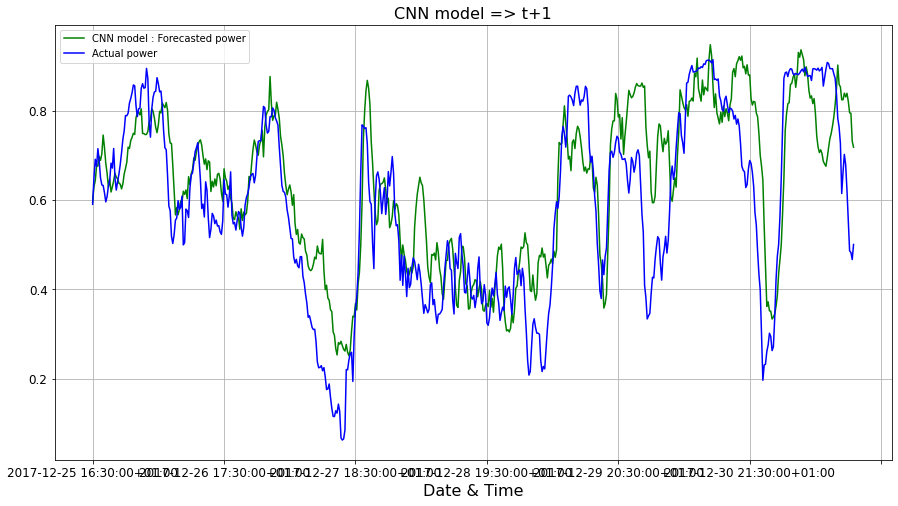

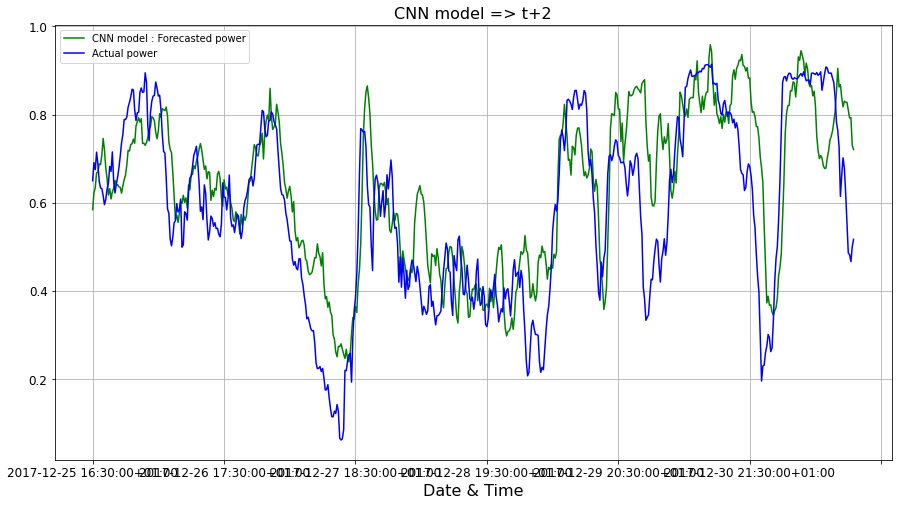

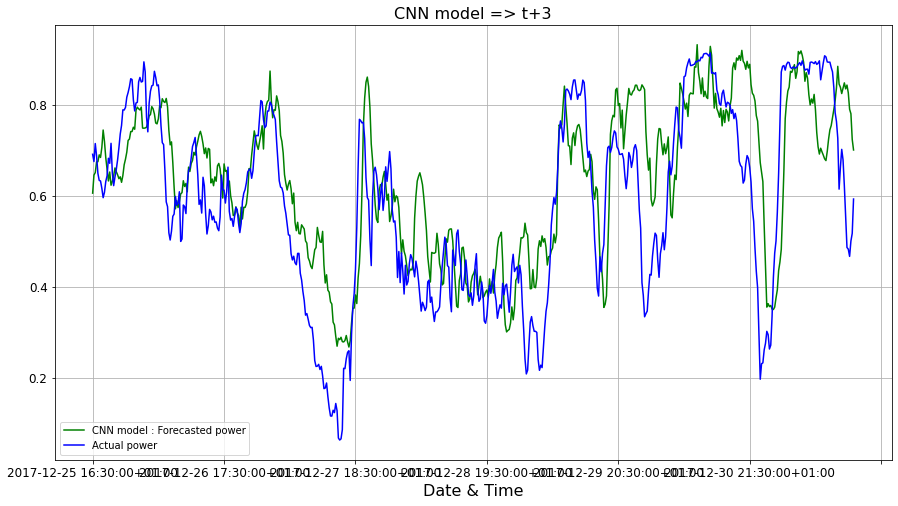

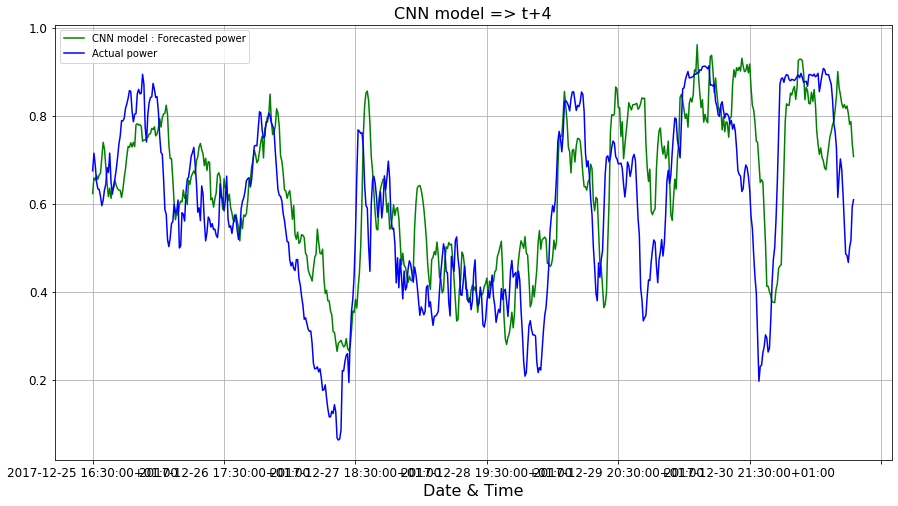

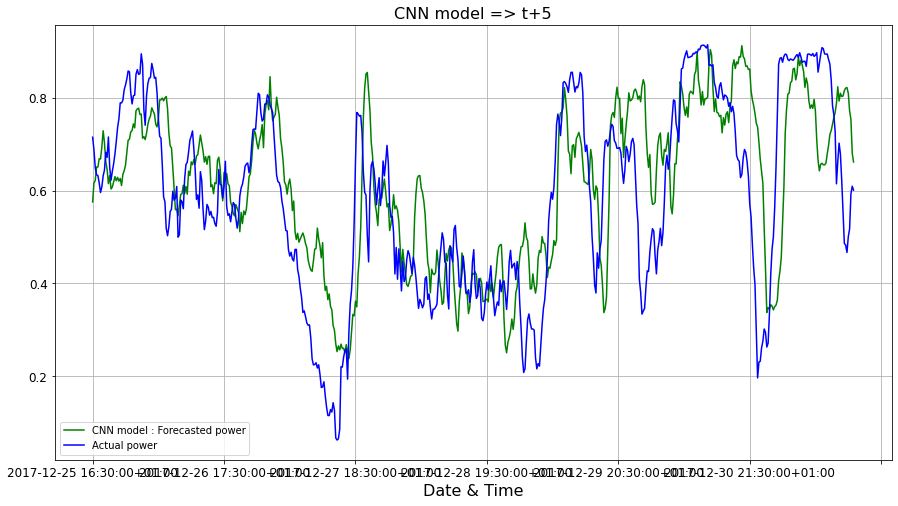

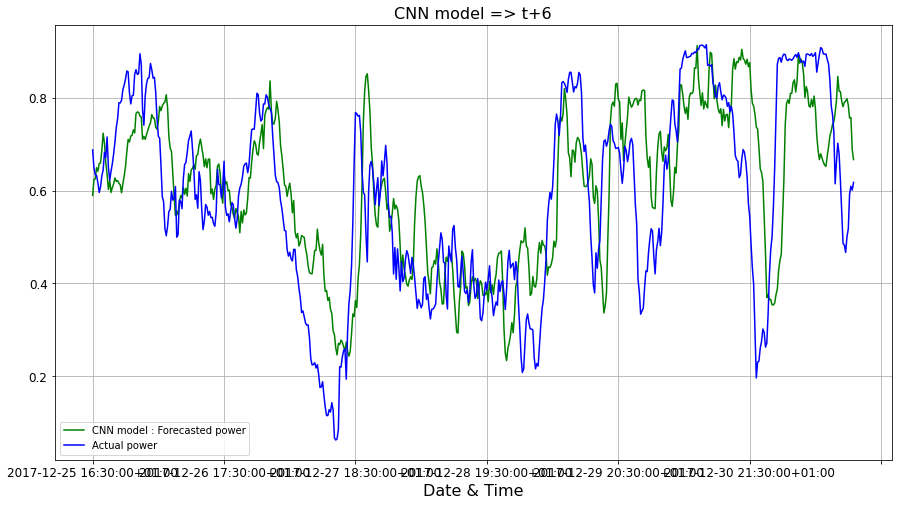

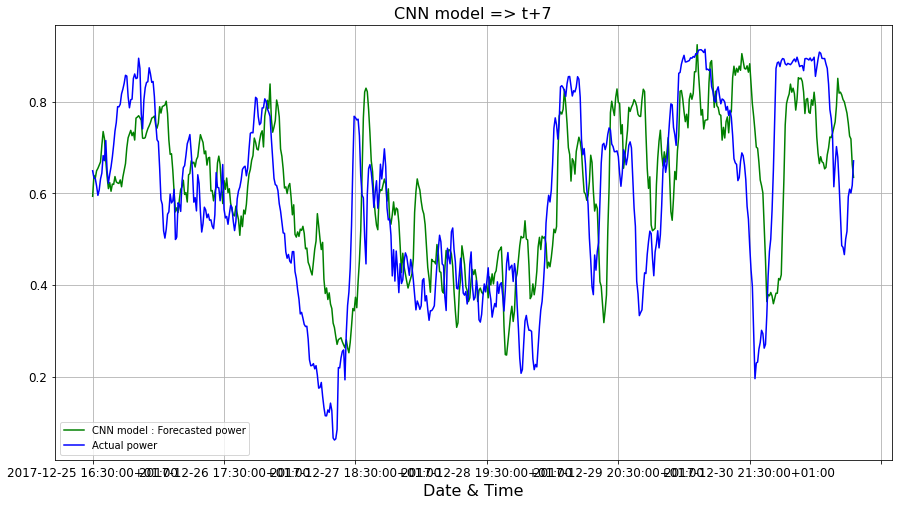

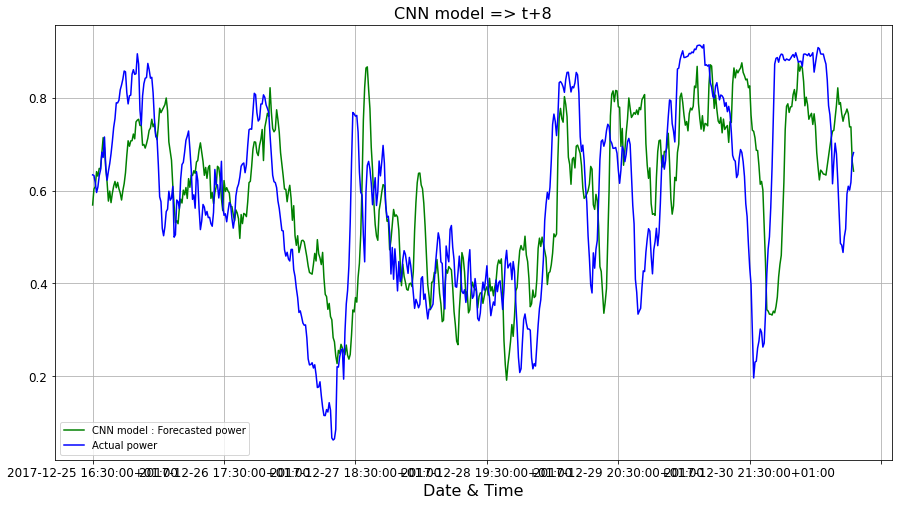

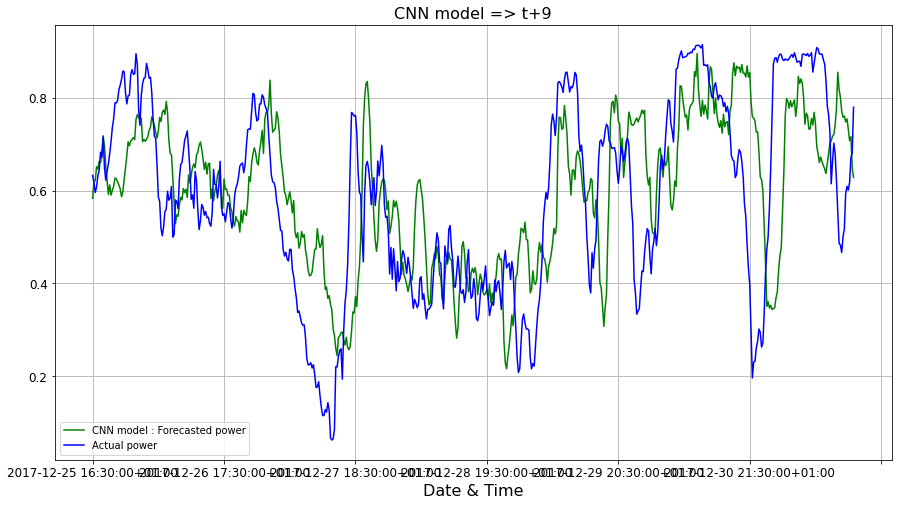

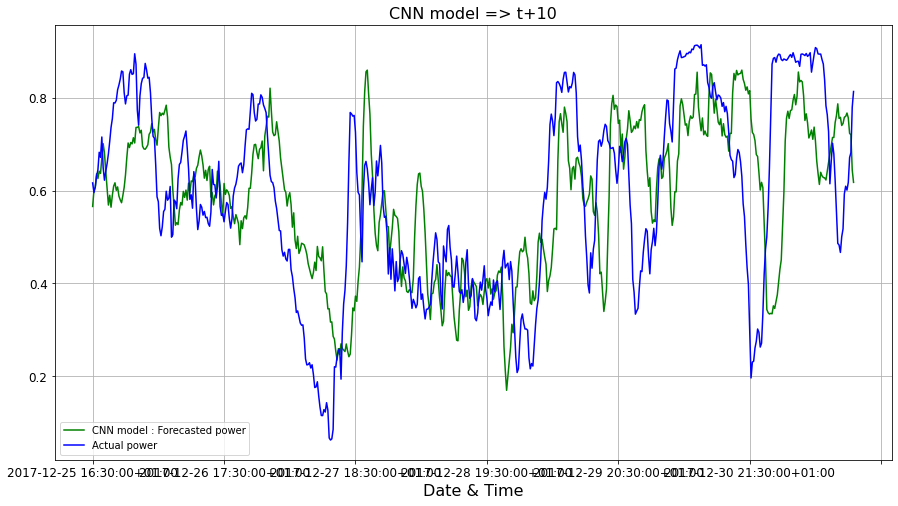

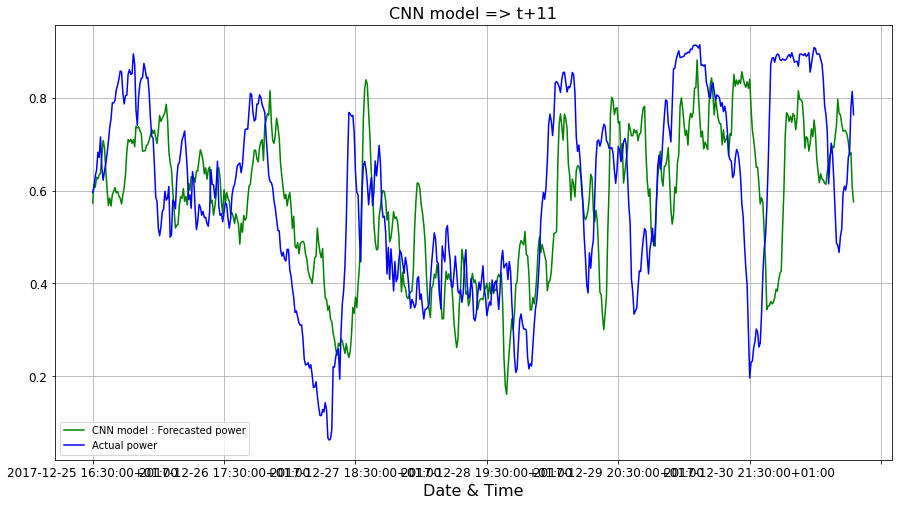

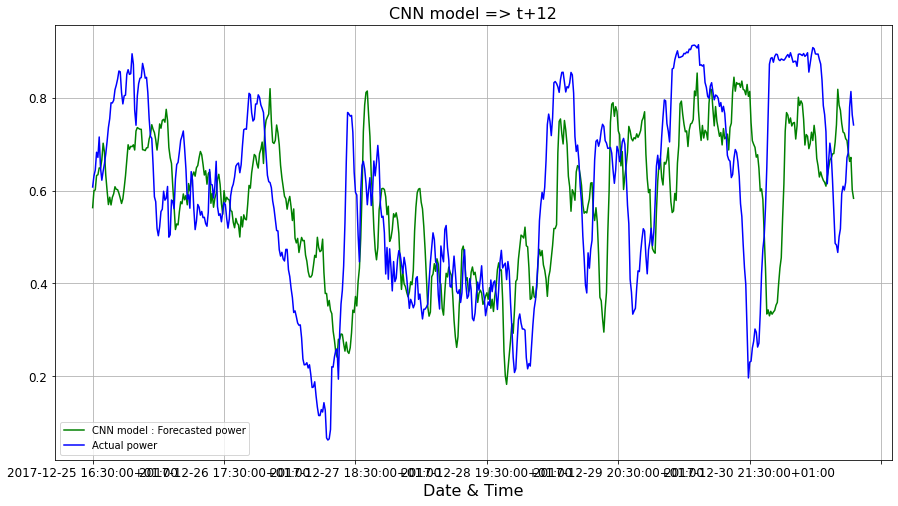

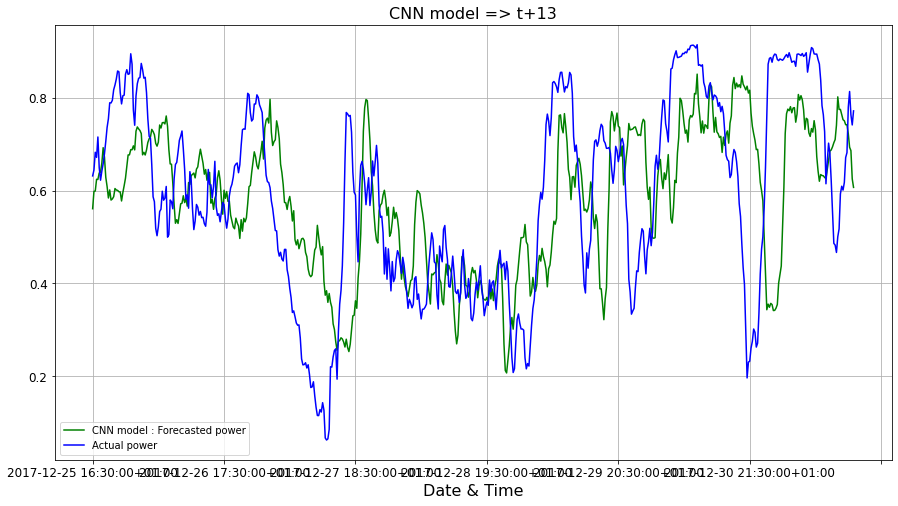

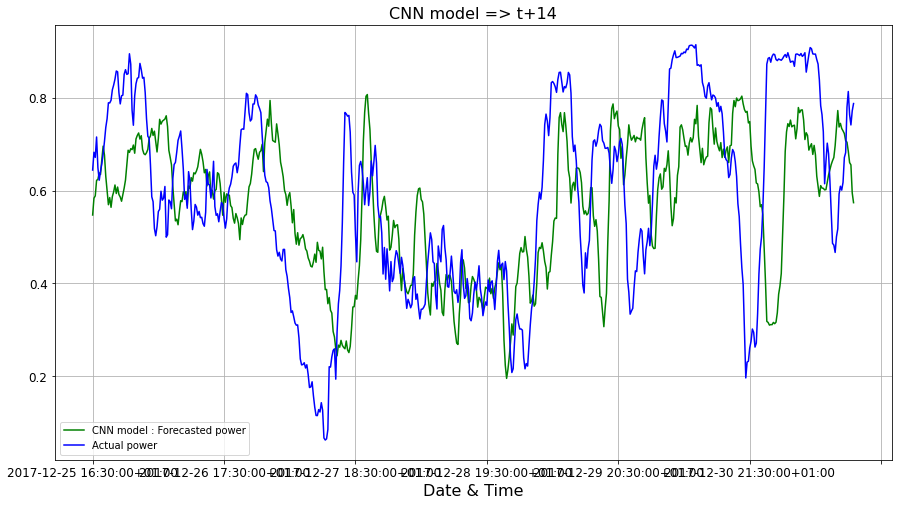

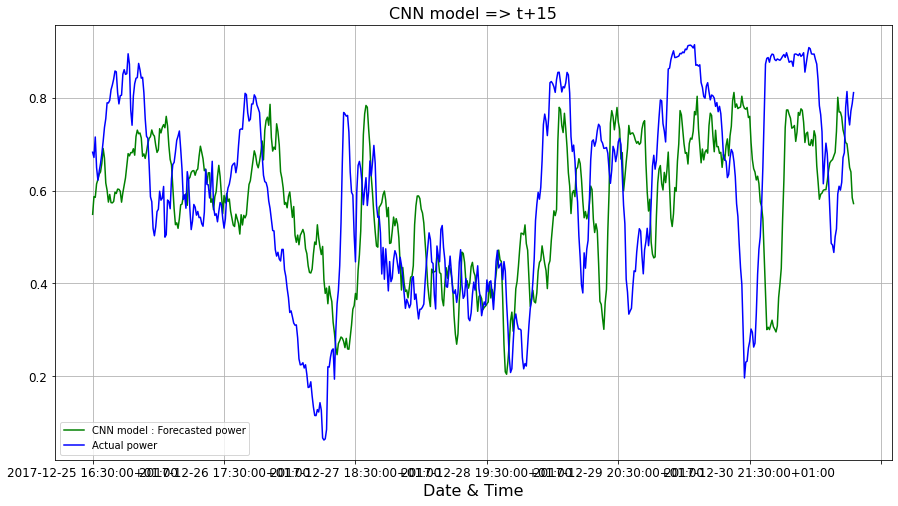

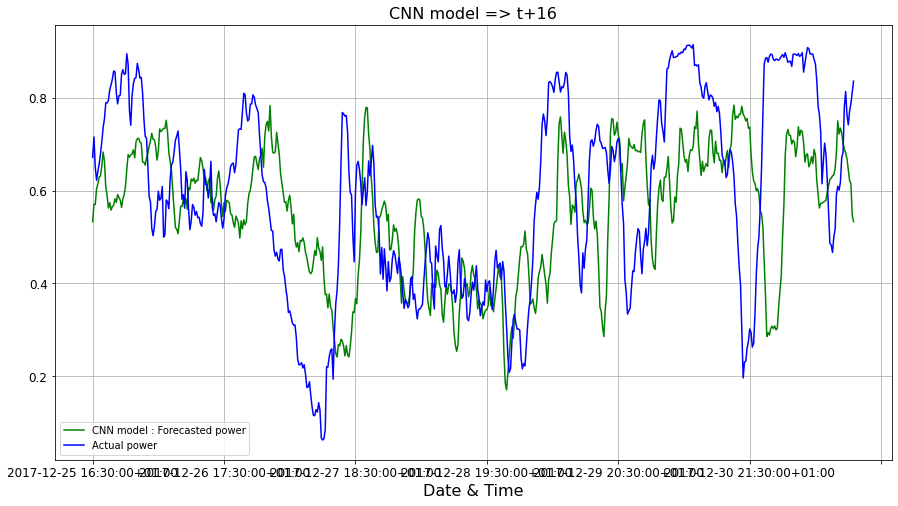

In [143]:
for i in range(1,HORIZON+1):
  x.plot(x='Date & Time', y=['predictions t+'+str(i),'actual t+'+str(i),], style=['g','b'],fontsize=12, figsize=(15, 8))
  plt.title("CNN model => t+"+str(i),fontsize=16)
  plt.xlabel('Date & Time', fontsize=16)
  plt.legend(['CNN model : Forecasted power', 'Actual power'])
  plt.grid()
  # plt.savefig("benchmark.png")
  plt.show()

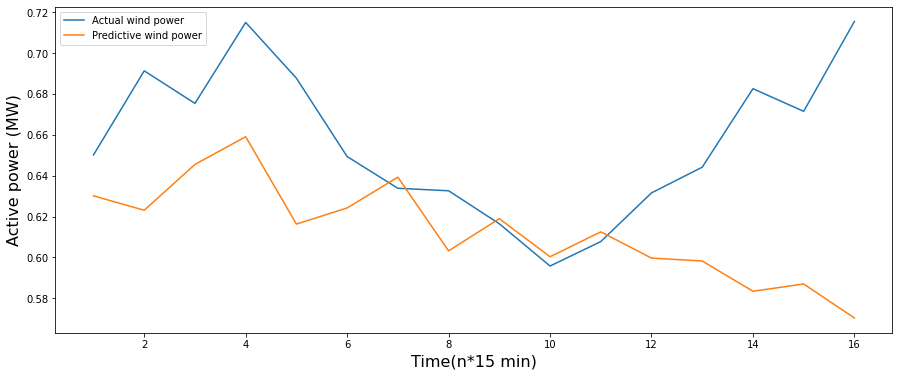

In [159]:
row=x.iloc[1]

y_axis_actual = np.array(row[["actual t+"+str(i) for i in range(1,HORIZON+1)]])
y_axis_pred = np.array(row[["predictions t+"+str(i) for i in range(1,HORIZON+1)]])
x_axis = np.array([i for i in range(1,HORIZON+1)])
plt.figure(figsize=(15,6))
plt.xlabel("Time(n*15 min)", fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.plot(x_axis,y_axis_actual)
plt.plot(x_axis,y_axis_pred)
plt.legend(["Actual wind power", 'Predictive wind power'])
plt.savefig("results.png")
plt.show()

In [47]:
fig1 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="CNN model:Expected vs predicted power forecasting") 
fig1.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig1.show()

NameError: ignored

In [ ]:
fig2 = px.line(eval_df,x='Date & Time', y=['actual','prediction'],labels={ "value": 'Active power (MW)'},title="GRU model:Expected vs predicted power") 
fig2.update_layout(xaxis_title_font_size=16,yaxis_title_font_size=16,title_font_color='red',title_font_size=20)
fig2.show()

In [138]:
x.plot(x='Date & Time', y=['prediction','actual'], style=['g','--b'],fontsize=12, figsize=(15, 8))
plt.title("GRU model:Expected vs predicted power forecasting",fontsize=16)
plt.xlabel('Date & Time', fontsize=16)
plt.ylabel('Active power (MW)', fontsize=16)
plt.grid()
plt.legend(['Our GRU model : Forecasted power', 'Actual Power'])
plt.savefig("GRU-results.pdf")
plt.savefig("GRU-results.png")
plt.show()

KeyError: ignored